## Chapter 3: First order methods

# 3.13 General steepest descent

In this post we describe several variations of normalized gradient descent, known generally as *steepest descent* algorithms. These variations arise out of a small but fundamental change to the gradient descent setup, a change that has significant impact on the form of a descent direction but importantly, not on the convergence of the methods (steepest descent methods converge under the same general condition as gradient descent, i.e., that the length of the steps eventually diminishes).

In [1]:
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_3_library')
sys.path.append('./chapter_3_videos') 

# import section helper
import section_3_13_helpers

# video paths
video_path_1 = 'chapter_3_videos/animation_15.mp4'
video_path_2 = 'chapter_3_videos/animation_16.mp4'

# standard imports
import matplotlib.pyplot as plt
import IPython

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## 3.13.1  Generalized Steepest descent

When we first discussed gradient descent the descent direction given by the negative gradient fell out naturally from a geometric understanding of hyperplanes. Here we begin our discussion of steepest descent algorithms by re-visiting gradient descent and deriving the descent direction using a more rigorous mathematical framework. This framework immediately suggests a way to generalize the gradient descent algorithm under different *norms*, which we then explore.

### Steepest descent direction in the $\ell_2$ norm

When first deriving the gradient descent direction of a multi-input function $g(\mathbf{w})$ at a point $\mathbf{v}$ we began by examining the tangent hyperplane to $g$ at this point

\begin{equation}
h\left(\mathbf{w}\right)=g\left(\mathbf{v}\right)+\nabla g\left(\mathbf{v}\right)^{T}\left(\mathbf{w}-\mathbf{v}\right)
\end{equation}

We then reasoned out that since in general we know that the *ascent* direction on a hyperplane is given by its set of 'slopes' - stored in $\nabla g(\mathbf{v})$ -  that intuitively therefore the descent direction is given by the negative gradient as $-\nabla g(\mathbf{v})$, or normalized to unit length as $-\frac{\nabla g(\mathbf{v})}{\left\Vert \nabla g(\mathbf{v}) \right\Vert_2 }$.  We often used the latter unit-normalized version since after all we care only about the descent *direction*.

This descent direction can be derived more formally as follows.  Note that $\mathbf{d} = \mathbf{w} - \mathbf{v}$ is a general search direction centered at the point $\mathbf{v}$.  We want to find the unit-length direction $\mathbf{d}$ that provides the smallest evaluation on the hyperplane, i.e., the one that gives the smallest value $g(\mathbf{v}) + \nabla g(\mathbf{v})^T(\mathbf{w} - \mathbf{v}) = g(\mathbf{v}) + \nabla g(\mathbf{v})^T\mathbf{d}$.  Since $\mathbf{d}$ is only present in the second term we only need care about finding the unit length direction $\mathbf{d}$ so that $\nabla g(\mathbf{v})^T\mathbf{d}$ is as small as possible (after all, $g(\mathbf{v})$ is constant).

Formally this is a simple constrained minimization problem

\begin{equation}
\begin{array}{cc}
\underset{\mathbf{d}}{\text{minimize}} & \nabla g(\mathbf{v})^{T}\mathbf{d}\\
\text{subject to} & \left\Vert \mathbf{d}\right\Vert _{2}=1\\
\end{array}
\end{equation}

Using the toy in the next Python cell we explore possible solutions to this problem in two dimensions for a particular choice of gradient vector, gaining valuable geometric intuition as to what the solution should be.  There we plot an example gradient vector $\nabla g (\mathbf{v})$ as a red arrow, along with the $\ell_2$ unit ball. Moving the slider from left to right you can test various directions $\mathbf{d}$ (each shown as a black arrow) on this $\ell_2$ unit ball computing the inner product $\nabla g(\mathbf{v})^{T}\mathbf{d}$, whose value is simultaneously plotted in the right panel.  As you move the slider right the direction providing the *smallest* value is shown as a green arrow in the left panel, and is highlighted in green in the plot in the right panel.  

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


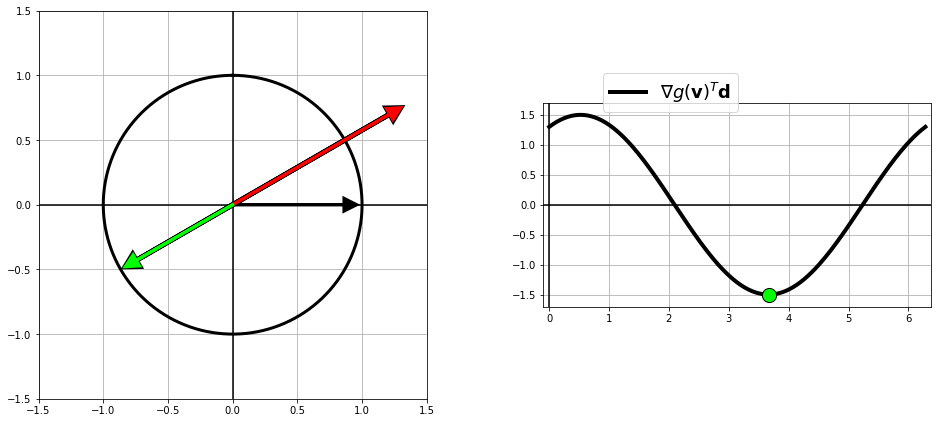

In [2]:
# create an animation showing the origin of the sine and cosine functions
num_frames = 200
pt = [1.3,0.75]
section_3_13_helpers.L2(pt,num_frames,savepath=video_path_1,fps=10)

In [3]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src='""" + video_path_1 + """' type="video/mp4">
  </video>
""")

As can be seen it appears as if indeed $\mathbf{d} = -\frac{\nabla g(\mathbf{v})}{\left\Vert \nabla g(\mathbf{v}) \right\Vert_2 }$ is the direction producing the smallest inner product.

To prove this formally we can use the *inner product rule* which tells us almost immediately what the solution to this problem is. According to the inner product rule $\nabla g(\mathbf{v})^{T}\mathbf{d}$ can be written as 

$$\nabla g(\mathbf{v})^{T}\mathbf{d} = \left \Vert \nabla g(\mathbf{v}) \right \Vert_2 \left \Vert \mathbf{d} \right \Vert_2 \text{cos}(\theta)$$ 

where $\theta$ is the angle between $\nabla g(\mathbf{v})$ and $\mathbf{d}$.

Noting that both $\left \Vert \nabla g(\mathbf{v}) \right \Vert_2$ and $\left \Vert \mathbf{d} \right \Vert_2$ have constant values (the former is the length of the gradient at $\mathbf{v}$, and latter is just $1$), the value of $\nabla g(\mathbf{v})^{T}\mathbf{d}$ is smallest when $\text{cos}(\theta)$ is smallest, i.e., when $\theta = \pi$. In other words, $\mathbf{d}$ must point in the same direction as $-\nabla g(\mathbf{v})$, and also be unit length. Thus we have $\mathbf{d} = -\frac{\nabla g(\mathbf{v})}{\left \Vert \nabla g(\mathbf{v}) \right \Vert_2}$, that is indeed the normalized gradient descent direction. In deriving the gradient descent direction in this way, $\mathbf{d}$ is referred to more generally as the *steepest descent direction*.

### Steepest descent direction in the $\ell_{\infty}$ norm

Replacing the $\ell_2$ norm with the $\ell_{\infty}$ norm in our original constrained optimization problem we have a similar looking problem whose solution defines a new kind of steepest descent direction

\begin{equation}
\begin{array}{cc}
\underset{\mathbf{d}}{\text{minimize}} & \nabla g(\mathbf{v})^{T}\mathbf{d}\\
\text{subject to} & \left\Vert \mathbf{d}\right\Vert _{\infty}=1\\
\end{array}
\end{equation}

Using the toy in the next Python cell we explore possible solutions to this problem in two dimensions for a particular choice of gradient vector, gaining valuable geometric intuition as to what the solution should be. Here once again we plot an example gradient vector $\nabla g (\mathbf{v})$ as a red arrow, along with the $\ell_{\infty}$ unit ball. Moving the slider from left to right you can test various directions $\mathbf{d}$ (each shown as a black arrow) on this $\ell_{\infty}$ unit ball computing the inner product $\nabla g(\mathbf{v})^{T}\mathbf{d}$, whose value is simultaneously plotted in the right panel. As you move the slider right once more the direction providing the *smallest* value is shown as a green arrow in the left panel, and is highlighted in green in the plot in the right panel.  

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


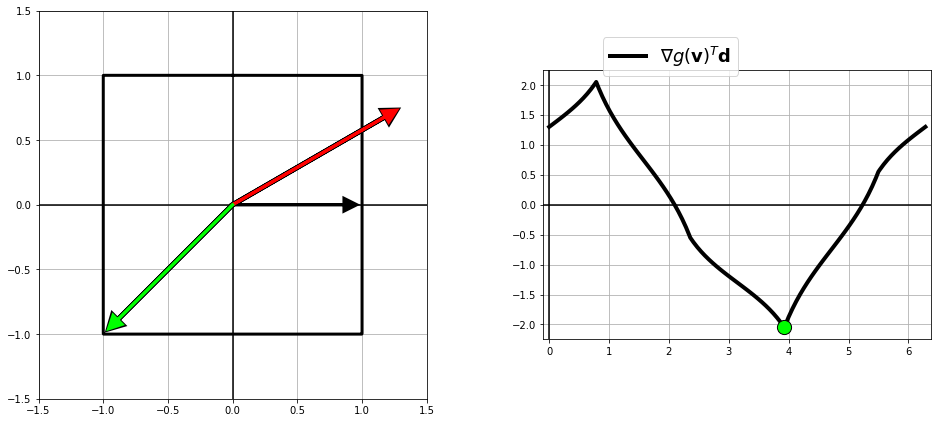

In [4]:
# create an animation showing the origin of the sine and cosine functions
num_frames = 100
pt = [1.3,0.75]
section_3_13_helpers.Linf(pt,num_frames,savepath=video_path_2,fps=10)

In [5]:
# load video into notebook
from IPython.display import HTML
HTML("""
<video width="1000" height="400" controls loop>
  <source src='""" + video_path_2 + """' type="video/mp4">
  </video>
""")

Based on the example above you may now have a hunch about what $\mathbf{d}$ should be. But let's make sure by examining a different gradient vector $\nabla g (\mathbf{v})$.   

Toying around with the slider above it looks as if *each* entry of the descent direction here is the negative unit length partial derivative along its respective coordinate. That is, the $j^{th}$ entry is given as

$$d_j = \frac{ \frac{\partial}{\partial w_j}g(\mathbf{v}) }{\left| \frac{\partial}{\partial w_j}g(\mathbf{v}) \right|} = \text{sign}\left(\frac{\partial}{\partial w_j}g(\mathbf{v})\right)$$

and hence the entire descent direction can be written simply as 

\begin{equation}
\mathbf{d} = -\, \text{sign}\left(\nabla g(\mathbf{v}) \right)
\end{equation}

These directions tend to most often be constrainted to the corners of the unit square or - in higher dimensions - the unit hypercube (the exceptions being when one partial derivative is exactly equal to zero).

This intuitied formula is in fact correct, and can be proven more rigorously as show in the Appendix Section of this post.

The steepest descent step at $\mathbf{w}^{k-1}$ in this direction looks like

\begin{equation}
\mathbf{w}^{k} = \mathbf{w}^{k-1} - \alpha\, \text{sign}\left(\nabla g(\mathbf{w}^{k-1}) \right)
\end{equation}

Due to the $\text{sign} (\cdot)$ function these steps tend to be at 'diagonal' traveling largely in directions defined by the corners of the unit square.  Because the set of directions is restricted one often sees the use of coordinate-wise steplength parameters with this method (e.g., [Rprop](https://en.wikipedia.org/wiki/Rprop)). 